# Recurrent Neural Network (RNN) for Time Series

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.preprocessing import MinMaxScaler

In [128]:
df= pd.read_csv("Alcohol_Sales.csv", index_col= 0, parse_dates= True)

In [129]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [130]:
df.columns = ["Sales"]

In [131]:
df.head()

,Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [132]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

In [133]:
df.index.freq= "MS"

In [134]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq='MS')

<AxesSubplot:xlabel='DATE'>

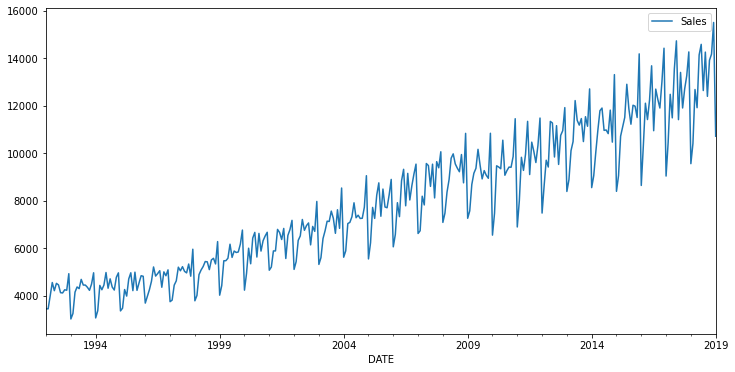

In [135]:
df.plot(figsize= (12,6))

### ETS Decomposition:

In [136]:
decomp = seasonal_decompose(df["Sales"], model= "additive")

<AxesSubplot:xlabel='DATE'>

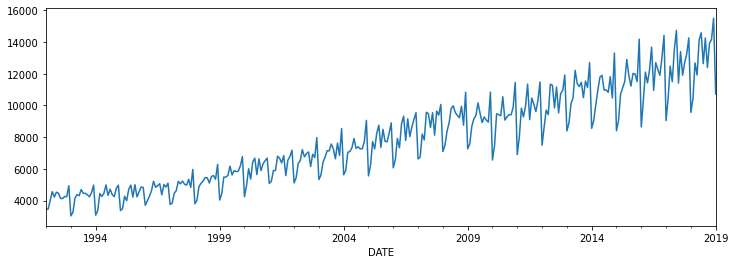

In [137]:
decomp.observed.plot(figsize= (12,4))

<AxesSubplot:xlabel='DATE'>

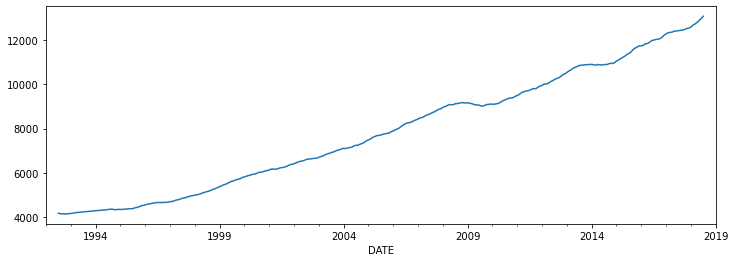

In [138]:
decomp.trend.plot(figsize= (12,4))

<AxesSubplot:xlabel='DATE'>

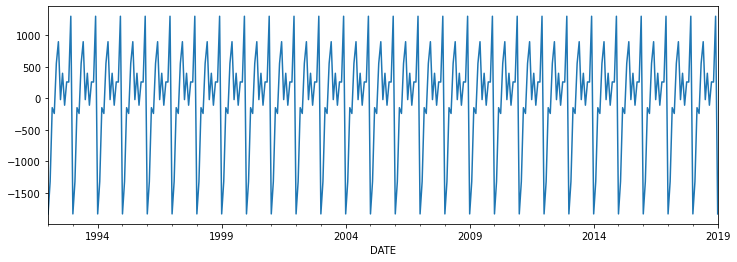

In [139]:
decomp.seasonal.plot(figsize= (12,4))

<AxesSubplot:xlabel='DATE'>

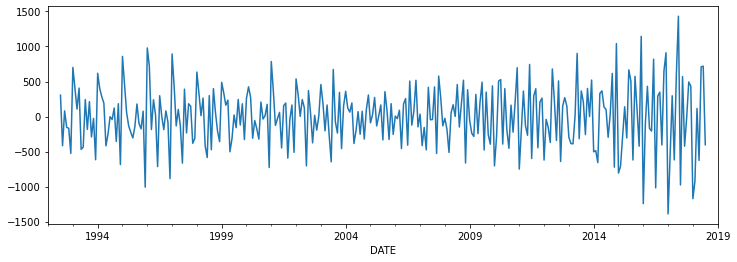

In [140]:
decomp.resid.plot(figsize= (12,4))

### Train Test Split:

In [141]:
len(df)

325

In [142]:
train_data = df[:313]
test_data = df[313:]

### Scalling:

In [143]:
scaler = MinMaxScaler()

In [144]:
scaler.fit(train_data)

MinMaxScaler()

In [145]:
scaled_train = scaler.transform(train_data)
scaled_test = scaler.transform(test_data)

In [146]:
scaled_train[:10]

array([[0.03658432],
       [0.03649885],
       [0.08299855],
       [0.13103684],
       [0.1017181 ],
       [0.12804513],
       [0.12266006],
       [0.09453799],
       [0.09359774],
       [0.10496624]])

In [147]:
scaled_test[:10]

array([[0.63116506],
       [0.82502778],
       [0.75972305],
       [0.94939738],
       [0.98743482],
       [0.82135225],
       [0.95956919],
       [0.80049577],
       [0.93025045],
       [0.95247457]])

### Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [148]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [149]:
n_inputs = 12
n_features = 1

In [150]:
time_gen = TimeseriesGenerator(data= scaled_train, targets= scaled_train, length= n_inputs, batch_size= 1)

In [151]:
time_gen[0]

(array([[[0.03658432],
         [0.03649885],
         [0.08299855],
         [0.13103684],
         [0.1017181 ],
         [0.12804513],
         [0.12266006],
         [0.09453799],
         [0.09359774],
         [0.10496624],
         [0.10334217],
         [0.16283443]]]),
 array([[0.]]))

In [152]:
# This Means It will take first 12 Values in to predict next one value.

### RNN:

In [153]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [154]:
model = Sequential()

model.add(LSTM(200, activation= "relu", input_shape= (n_inputs, n_features)))

model.add(Dense(1))

model.compile(loss= "mse", optimizer= "adam")

In [155]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 200)               161600    
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [156]:
model.fit(time_gen, epochs= 50)

Epoch 1/50
301/301 [==============================] - 3s 7ms/step - loss: 0.0154
Epoch 2/50
301/301 [==============================] - 2s 7ms/step - loss: 0.0096
Epoch 3/50
301/301 [==============================] - 2s 8ms/step - loss: 0.0087
Epoch 4/50
301/301 [==============================] - 4s 13ms/step - loss: 0.0070
Epoch 5/50
301/301 [==============================] - 2s 8ms/step - loss: 0.0061
Epoch 6/50
301/301 [==============================] - 3s 10ms/step - loss: 0.0038
Epoch 7/50
301/301 [==============================] - 2s 7ms/step - loss: 0.0028
Epoch 8/50
301/301 [==============================] - 3s 11ms/step - loss: 0.0027
Epoch 9/50
301/301 [==============================] - 3s 9ms/step - loss: 0.0026
Epoch 10/50
301/301 [==============================] - 3s 10ms/step - loss: 0.0024
Epoch 11/50
301/301 [==============================] - 4s 12ms/step - loss: 0.0019: 0s - loss: 0.
Epoch 12/50
301/301 [==============================] - 2s 7ms/step - loss: 0.0016
Epoch

In [157]:
model.history.history["loss"]

[0.015441596508026123,
 0.009560719132423401,
 0.008701767772436142,
 0.006994305178523064,
 0.006077227182686329,
 0.0038344250060617924,
 0.0028182887472212315,
 0.0027443217113614082,
 0.002592771779745817,
 0.0023539827670902014,
 0.001938176341354847,
 0.001638256129808724,
 0.0020602724980562925,
 0.0017446994315832853,
 0.0017291945405304432,
 0.0019178297370672226,
 0.0017216346459463239,
 0.001437390223145485,
 0.0017046885332092643,
 0.0015786334406584501,
 0.0015451378421857953,
 0.0016924634110182524,
 0.0015592233976349235,
 0.0016855167923495173,
 0.0015571678522974253,
 0.001557197654619813,
 0.0017267720540985465,
 0.0014704684726893902,
 0.0015367233427241445,
 0.0015356272924691439,
 0.0016109044663608074,
 0.0014838592614978552,
 0.0014166535111144185,
 0.0014874461339786649,
 0.0015876813558861613,
 0.0015138364396989346,
 0.0015153915155678988,
 0.0016349863726645708,
 0.0015045427717268467,
 0.0013078091433271766,
 0.0012111992109566927,
 0.0014693834818899632,
 0

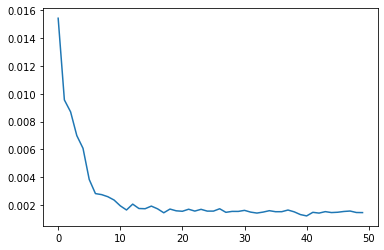

In [158]:
plt.plot(range(len(model.history.history["loss"])), model.history.history["loss"])

### Prediction on Test Data:

In [159]:
# We need Previous 12 points from Train Data to Predict first Test Data Value:

first_batch = scaled_train[-12:]

In [160]:
first_batch

array([[0.63432772],
       [0.80776135],
       [0.72313873],
       [0.89870929],
       [1.        ],
       [0.71672793],
       [0.88648602],
       [0.75869732],
       [0.82742115],
       [0.87443371],
       [0.96025301],
       [0.5584238 ]])

In [161]:
# We need to Reshape this Batch in shape of Time Generator:

time_gen[0]

(array([[[0.03658432],
         [0.03649885],
         [0.08299855],
         [0.13103684],
         [0.1017181 ],
         [0.12804513],
         [0.12266006],
         [0.09453799],
         [0.09359774],
         [0.10496624],
         [0.10334217],
         [0.16283443]]]),
 array([[0.]]))

In [162]:
x,y = time_gen[0]

In [163]:
x.shape

(1, 12, 1)

In [164]:
first_batch = first_batch.reshape((1,n_inputs, n_features))

In [165]:
first_batch

array([[[0.63432772],
        [0.80776135],
        [0.72313873],
        [0.89870929],
        [1.        ],
        [0.71672793],
        [0.88648602],
        [0.75869732],
        [0.82742115],
        [0.87443371],
        [0.96025301],
        [0.5584238 ]]])

In [166]:
model.predict(first_batch)

array([[0.69846725]], dtype=float32)

In [167]:
model.predict(first_batch)[0]

array([0.69846725], dtype=float32)

In [168]:
scaled_test

array([[0.63116506],
       [0.82502778],
       [0.75972305],
       [0.94939738],
       [0.98743482],
       [0.82135225],
       [0.95956919],
       [0.80049577],
       [0.93025045],
       [0.95247457],
       [1.0661595 ],
       [0.65706471]])

In [169]:
# So, we used first_batch of 12 previous values to Predict One Next Value (First Value of Test Data).

In [170]:
# We need to run a loop for predicting next values and we need to keep removinh first values from batch and keep adding 
# current prediction to batch.

In [171]:
test_prediction = []

batch = scaled_train[-n_inputs:]
batch = batch.reshape((1,n_inputs,n_features))

for i in range(len(test_data)):
    
    # Get 1st Prediction using 12 values from Batch:
    current_pred = model.predict(batch)[0]
    
    # Append Current Prediction to Test Predictions:
    test_prediction.append(current_pred)
    
    # Update Batch: Remove first value and add current prediction as last value in batch:
    batch = np.append(batch[:, 1:, :], [[current_pred]], axis= 1)

In [172]:
test_prediction

[array([0.69846725], dtype=float32),
 array([0.8102724], dtype=float32),
 array([0.7745617], dtype=float32),
 array([0.9327351], dtype=float32),
 array([1.0367713], dtype=float32),
 array([0.7513616], dtype=float32),
 array([0.92365044], dtype=float32),
 array([0.77132374], dtype=float32),
 array([0.87254506], dtype=float32),
 array([0.8921665], dtype=float32),
 array([0.99908805], dtype=float32),
 array([0.58118546], dtype=float32)]

### Inverse Scalling of Predictions to Compare:

In [173]:
unscaled_preds = scaler.inverse_transform(test_prediction)

In [174]:
unscaled_preds

array([[11202.36841202],
       [12510.37675625],
       [12092.5973658 ],
       [13943.06776512],
       [15160.18740892],
       [11821.1794579 ],
       [13836.78653914],
       [12054.7164399 ],
       [13238.90469784],
       [13468.45582879],
       [14719.33108449],
       [ 9830.2886976 ]])

In [175]:
test_data

,Sales
DATE,
2018-02-01,10415
2018-03-01,12683
2018-04-01,11919
2018-05-01,14138
2018-06-01,14583
2018-07-01,12640
2018-08-01,14257
2018-09-01,12396
2018-10-01,13914


In [176]:
test_data["Predictions"] = unscaled_preds

C:\Users\Shailya\AppData\Local\Temp/ipykernel_10492/1283401480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Predictions"] = unscaled_preds


In [177]:
test_data

,Sales,Predictions
DATE,,
2018-02-01,10415,11202.368412
2018-03-01,12683,12510.376756
2018-04-01,11919,12092.597366
2018-05-01,14138,13943.067765
2018-06-01,14583,15160.187409
2018-07-01,12640,11821.179458
2018-08-01,14257,13836.786539
2018-09-01,12396,12054.716440
2018-10-01,13914,13238.904698


<AxesSubplot:xlabel='DATE'>

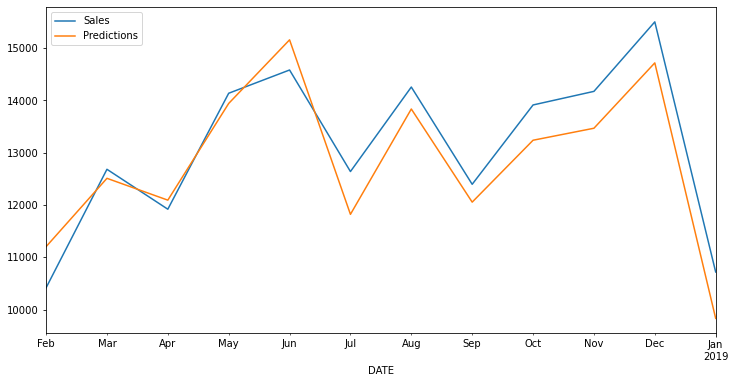

In [178]:
# Plotting Test vs Predictions:

test_data.plot(figsize= (12,6))